<a href="https://colab.research.google.com/github/Qudie/Diplom/blob/master/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №2
### ПИН-11М
Бельгушева Алла

In [ ]:
from __future__ import print_function
import numpy as np
from matplotlib import pyplot as plot
from scipy import optimize

In [ ]:
def plot_data(X, y, show=True):
  pos = y.nonzero()[0]
  neg = (y == 0).nonzero()[0]
  plot.plot(X[pos, 0], X[pos, 1], 'k+', markersize=7, linewidth=2)
  plot.plot(X[neg, 0], X[neg, 1], 'ko', markerfacecolor='y', markersize=7, linewidth=2)
  plot.xlabel('Exam 1 score')
  plot.ylabel('Exam 2 score')
  if show:
    plot.show()

def sigmoid(x):
  return 1.0 / (1.0 + np.exp(-x))

def cost_function(theta, X, y):
  m = X.shape[0]
  h = sigmoid(X.dot(theta))
  cost = sum(-y * np.log(h) - (1.0 - y) * np.log(1.0 - h))
  grad = X.T.dot(h - y)
  return (cost / m, grad / m)

def predict(theta, X):
  return sigmoid(X.dot(theta)) >= 0.5

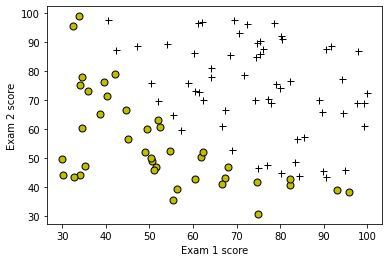

Cost at initial theta (zeros): 0.693147
Gradient at initial theta (zeros): 
 [ -0.1        -12.00921659 -11.26284221]
Cost at theta found by scipy.optimize.minimize: 0.203498
theta: 
 [-25.16130062   0.20623142   0.20147143]


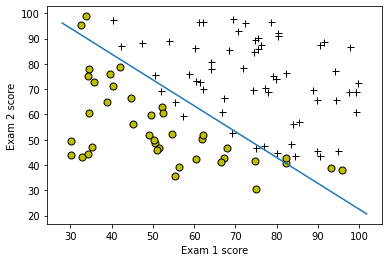

For a student with scores 45 and 85, we predict an admission probability of 0.776292
Train accuracy: 89.00 %


In [ ]:
data1 = np.loadtxt('ex2data1.txt', delimiter=',')
X = data1[:, 0:2]
y = data1[:, 2]
plot_data(X, y)
m, n = X.shape
X = np.concatenate((np.ones((m, 1)), X), axis=1)
initial_theta = np.zeros(n + 1)
cost, grad = cost_function(initial_theta, X, y)
print('Cost at initial theta (zeros): %f' % cost)
print('Gradient at initial theta (zeros): \n %s' % grad)
# we need to do some wrapping to play nice with minimize
wrapped = lambda t: cost_function(t, X, y)[0]
result = optimize.minimize(
  wrapped,
  initial_theta,
  method='Nelder-Mead',
  options={
    'maxiter': 400,
    'disp': False,
  }
)
theta = result.x
cost = result.fun
print('Cost at theta found by scipy.optimize.minimize: %f' % cost)
print('theta: \n %s' % theta)
# plot the decision boundary
plot_x = np.array([X[:, 1].min() - 2, X[:, 1].max() + 2])
plot_y = (-theta[0] - theta[1] * plot_x) / theta[2]
plot_data(X[:, 1:], y, show=False)
plot.plot(plot_x, plot_y)
plot.show()
# prediction
prob = sigmoid(np.array([1, 45, 85]).dot(theta))
print('For a student with scores 45 and 85, we predict an admission probability of %f' % prob)
predictions = predict(theta, X)
accuracy = 100 * np.mean(predictions == y)
print('Train accuracy: %0.2f %%' % accuracy)

In [ ]:
def map_feature(X1, X2, degree=6):
  """
  Creates polynomial features up to ``degree``.
  """
  m = X1.shape[0] if X1.shape else 1
  cols = [np.ones(m)]
  for i in range(1, degree + 1):
    for j in range(i + 1):
      cols.append((X1 ** (i - j)) * (X2 ** j))
  return np.vstack(cols).T

def cost_function_reg(theta, X, y, lambda_):
  """
  Regularized logistic regression cost function.
  """
  m = X.shape[0]
  cost, gradient = cost_function(theta, X, y)
  reg_cost = (lambda_ / (2.0 * m)) * np.sum(theta[1:] ** 2)
  reg_gradient = (lambda_ / m) * theta
  reg_gradient[0] = 0
  return cost + reg_cost, gradient + reg_gradient

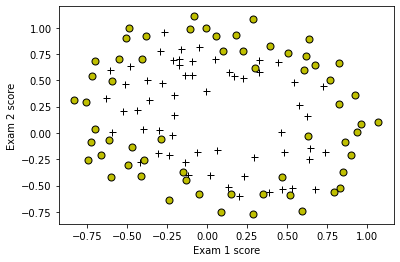

Cost at initial theta (zeros): 0.693147


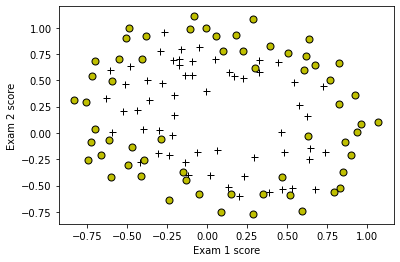

Train accuracy: 83.05 %


In [ ]:
data1 = np.loadtxt('ex2data2.txt', delimiter=',')
X_original = X = data1[:, 0:2]
y = data1[:, 2]
plot_data(X, y)
X = map_feature(X[:, 0], X[:, 1])
m, n = X.shape
initial_theta = np.zeros(n)
lambda_ = 1.0
cost, grad = cost_function_reg(initial_theta, X, y, lambda_)
print('Cost at initial theta (zeros): %f' % cost)
result = optimize.minimize(
  cost_function_reg,
  initial_theta,
  args=(X, y, lambda_),
  method='CG',
  jac=True,
  options={
    'maxiter': 400,
    'disp': False,
  }
)
theta = result.x
# plot the decision boundary
plot_data(X_original, y, show=False)
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((u.size, v.size))
for i in range(u.size):
  for j in range(v.size):
    z[i, j] = map_feature(u[i], v[j]).dot(theta)
plot.show()
predictions = predict(theta, X)
accuracy = 100 * np.mean(predictions == y)
print('Train accuracy: %0.2f %%' % accuracy)